# Popular Data Science Questions

Introduction

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

The result of the query was stored in a file called *2019_questions.csv*. We will be exploring and working with the data in this file.

In [17]:
df = pd.read_csv("2019_questions.csv", parse_dates=["CreationDate"])

df.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


In [19]:
df.FavoriteCount.isnull().sum()

7432

We can see that 7432 out of 8839 rows in *FavoriteCount* are missing values. Since a missing value in this column likely means that the question was not present in any users' favorite list, we can replace the missing values with 0.

In [20]:
df.fillna(value={"FavoriteCount": 0}, inplace=True)

It might also be that we have an issue with the *Tag* column.

In [21]:
print(type(df.Tags[0]))
print(df.Tags[0])

<class 'str'>
<machine-learning><data-mining>


Indeed, we have a simple string representing a series of tags, which are separated by the *><* symbols. It would be best if we transformed these tags into a list, so that each row containts a list of the different tags.

In [22]:
df["Tags"] = df["Tags"].str.replace("^<|>$", "").str.split("><")
df.head(2)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,"[machine-learning, data-mining]",0,0.0
1,44420,2019-01-23 09:34:01,0,25,"[machine-learning, regression, linear-regressi...",0,0.0


# xxx

In [25]:
def count_tags(df):
    
    tag_count = {}

    for tags in df["Tags"]:
        for tag in tags:
            if tag in tag_count:
                tag_count[tag] += 1
            else:
                tag_count[tag] = 1
                
    return tag_count

In [28]:
tag_count = count_tags(df)
tag_count_df = pd.DataFrame.from_dict(tag_count, orient='index')
tag_count_df.rename(columns={0:"Tag_Count"},inplace=True)
tag_count_df.sort_values(by="Tag_Count",ascending=False, inplace=True)
top_ten_tags = tag_count_df.head(10)
top_ten_tags

,Tag_Count
machine-learning,2693
python,1814
deep-learning,1220
neural-network,1055
keras,935
classification,685
tensorflow,584
scikit-learn,540
nlp,493
cnn,489


Machine learning is by far the tag that appears the most, followed by Python and deep learning.

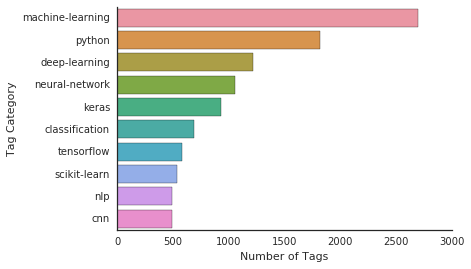

In [54]:
import seaborn as sns
sns.set_style('white')


ax = sns.barplot(data=top_ten_tags, y=top_ten_tags.index, x='Tag_Count')
sns.despine()
plt.xlabel("Number of Tags")
plt.ylabel("Tag Category")
plt.show()

We can also look at the categories that got the most views.

In [43]:
def view_count(df):
    tag_view_count = dict()

    for index, row in df.iterrows():
        for tag in row['Tags']:
            if tag in tag_view_count:
                tag_view_count[tag] += row['ViewCount']
            else:
                tag_view_count[tag] = row['ViewCount']
    
    return tag_view_count

In [49]:
tag_view_count = view_count(df)
tag_view_count_df = pd.DataFrame.from_dict(tag_view_count, orient="index")
tag_view_count_df.rename(columns={0: "ViewCount"}, inplace=True)

most_viewed = tag_view_count_df.sort_values(by="ViewCount").tail(10)
most_viewed = most_viewed.iloc[::-1]

most_viewed

,ViewCount
python,537585
machine-learning,388499
keras,268608
deep-learning,233628
pandas,201787
neural-network,185367
scikit-learn,128110
tensorflow,121369
classification,104457
dataframe,89352


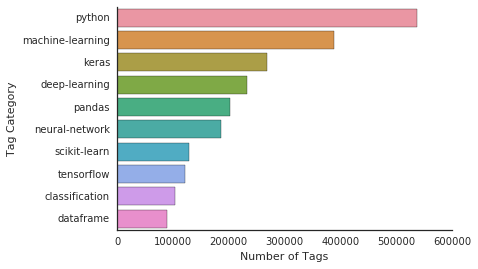

In [53]:
ax = sns.barplot(data=most_viewed, y=most_viewed.index, x='ViewCount')
sns.despine()
plt.xlabel("Number of Tags")
plt.ylabel("Tag Category")
plt.show()

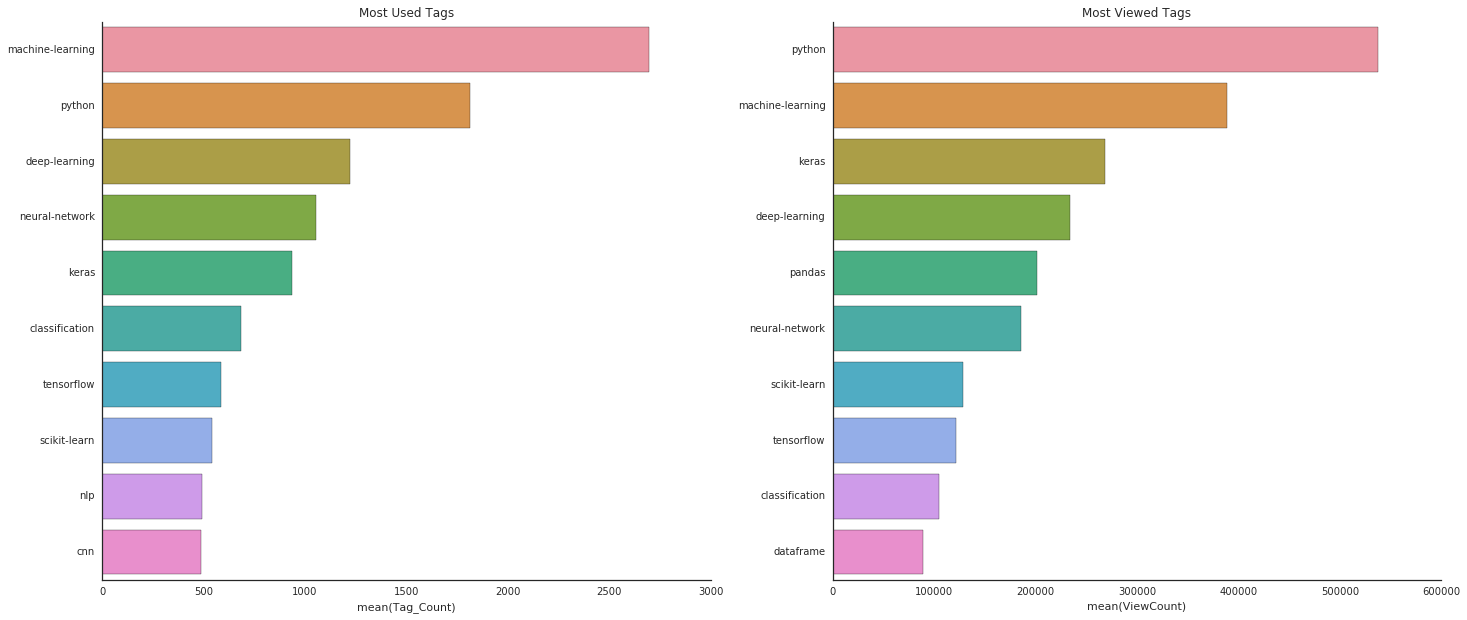

In [58]:
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((24, 10))
sns.barplot(data=top_ten_tags, y=top_ten_tags.index, x='Tag_Count', ax=ax1)
ax1.set_title('Most Used Tags')
sns.barplot(data=most_viewed, y=most_viewed.index, x='ViewCount', ax=ax2)
ax2.set_title('Most Viewed Tags')
sns.despine()

## *Is deep learning just a fad?*

Further exploration via analysis of *all_questions.csv* document. Similar process as before

In [60]:
all_questions = pd.read_csv('all_questions.csv',parse_dates=["CreationDate"])
all_questions['Tags'] = all_questions['Tags'].str.replace("^<|>$", "").str.split("><")
all_questions.head()

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]"
1,45418,2019-02-12 00:50:39,[neural-network]
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]"
3,45426,2019-02-12 04:51:49,[keras]
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode..."


In [63]:
def deep_learning(tags):
    dl_set = ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"]
    for tag in tags:
        if tag in dl_set:
            return 1
        else:
            return 0

In [64]:
all_questions["Deep_Learning"] = all_questions["Tags"].apply(deep_learning)
all_questions.head()

,Id,CreationDate,Tags,Deep_Learning
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",0
1,45418,2019-02-12 00:50:39,[neural-network],1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0
3,45426,2019-02-12 04:51:49,[keras],1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0


In [66]:
all_questions = all_questions[all_questions["CreationDate"].dt.year < 2020]
def quarter(time):
    year = str(time.year)
    quarter = str(((time.month-1))//3+1)
    return year+"Q"+quarter

all_questions["Quarter"] = all_questions["CreationDate"].apply(quarter)
all_questions.head()

,Id,CreationDate,Tags,Deep_Learning,Quarter
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",0,2019Q1
1,45418,2019-02-12 00:50:39,[neural-network],1,2019Q1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0,2019Q1
3,45426,2019-02-12 04:51:49,[keras],1,2019Q1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0,2019Q1


### Questions per quarter

In [68]:
questions_per_quarter = all_questions.groupby("Quarter").agg({"Deep_Learning":['sum','size']})
questions_per_quarter.columns = ['DL_Questions', 'Total_Questions']
questions_per_quarter['DL_percentage'] = questions_per_quarter['DL_Questions']/questions_per_quarter["Total_Questions"]
questions_per_quarter.reset_index(inplace=True)
questions_per_quarter.head()

,Quarter,DL_Questions,Total_Questions,DL_percentage
0,2014Q2,3,157,0.019108
1,2014Q3,4,189,0.021164
2,2014Q4,4,216,0.018519
3,2015Q1,5,190,0.026316
4,2015Q2,6,284,0.021127


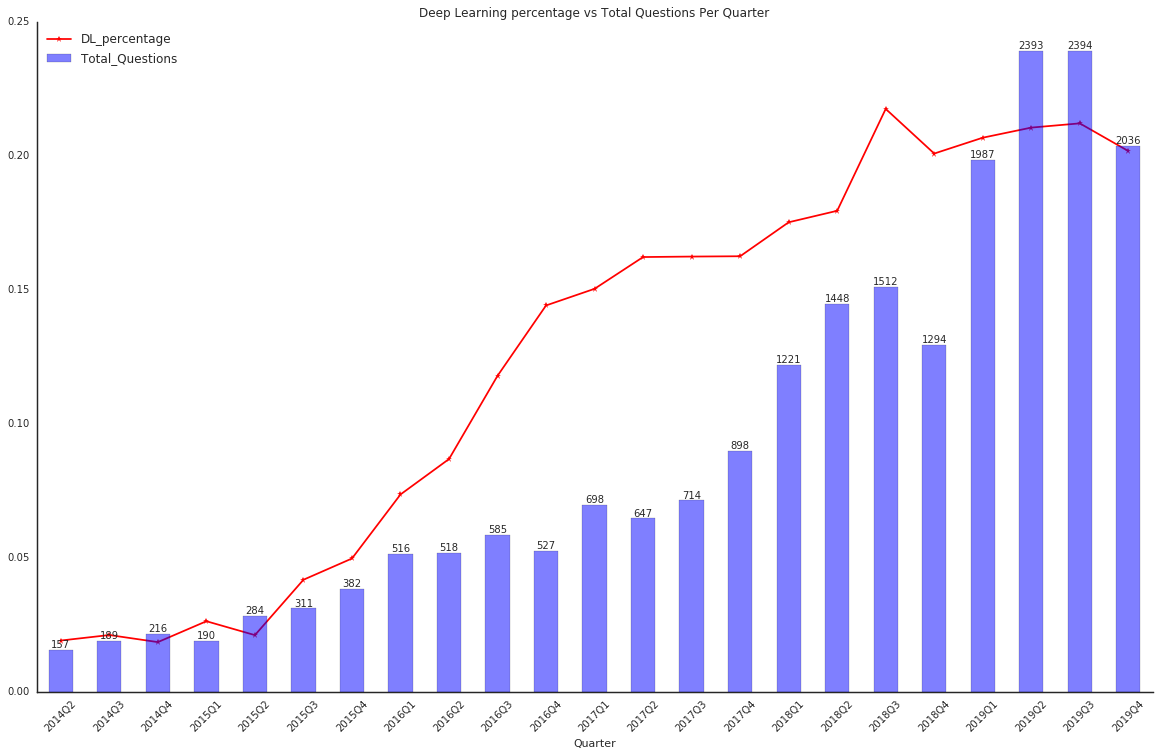

In [69]:
ax1 = questions_per_quarter.plot(x="Quarter",y="DL_percentage",kind="line", linestyle = "-", marker = "*", color = "red", figsize=(20,12))
ax2 = questions_per_quarter.plot(x="Quarter",y="Total_Questions", kind="bar",ax=ax1, secondary_y=True,alpha=0.5, rot=45, color="blue")

for idx, t in questions_per_quarter["Total_Questions"].iteritems():
    ax2.text(idx, t, str(t), ha="center", va="bottom")
xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})

for ax in (ax1,ax2):
    for loc in ("top", "right"):
        ax.spines[loc].set_visible(False)
        ax.tick_params(right=False, labelright = False)

plt.title("Deep Learning percentage vs Total Questions Per Quarter")



plt.show()